Try to figure out the spatial and redshift overlap between the different catalogs, what is the cluster sample we can use. 

- SDSS phot
- SDSS spec
- DES Y1
- DES Y3

In [62]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord
from pylab import cm
mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
from pylab import cm as cm

nside = 4096

Populating the interactive namespace from numpy and matplotlib


In [112]:
planck = pf.open('HFI_PCCS_SZ-union_R2.08.fits')[1].data
Planck_z = planck['redshift']
Planck_ra = planck['ra']
Planck_dec = planck['dec']
Planck_mass = planck['msz']
Planck_snr = planck['snr']

In [64]:
sdss_dr8_cat = pf.open('/Users/chihwaychang/Dropbox/splashback_measurements/cc_cats/morphology_dr8.fits')[1].data
sdss_ra = sdss_dr8_cat['ra']
sdss_dec = sdss_dr8_cat['dec']

sdss_mask = np.zeros(hp.nside2npix(nside))
theta = (90.- sdss_dec)/180*np.pi
phi = sdss_ra/180*np.pi
pix = hp.ang2pix(nside, theta, phi)
sdss_mask[pix] = 1

In [65]:
des_y1_mask = hp.read_map('/Users/chihwaychang/Dropbox/splashback_measurements/final_cats_fixedjk/fiducial_mask.fits')

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [67]:
# DES Y3 masks
des_y3_mask = hp.read_map('y3a2_gold_2_2_1_sof_nside4096_nest_i_depth.fits.gz',nest=False)
des_y3_mask[des_y3_mask<21.5] = 0
des_y3_mask[des_y3_mask>=21.5] = 1

NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [83]:
decals_ra = pf.open('survey-bricks-dr7.fits.gz')[1].data['ra'][pf.open('survey-bricks-dr7.fits.gz')[1].data['nobjs']>0]
decals_dec = pf.open('survey-bricks-dr7.fits.gz')[1].data['dec'][pf.open('survey-bricks-dr7.fits.gz')[1].data['nobjs']>0]
decals_mask = np.zeros(hp.nside2npix(nside))
theta = (90.- decals_dec)/180*np.pi
phi = decals_ra/180*np.pi
pix = hp.ang2pix(nside, theta, phi)
decals_mask[pix] = 1

In [84]:
pix = np.arange(hp.nside2npix(nside))
theta, phi = hp.pix2ang(nside, pix,nest=True)
ra_nest = phi/np.pi*180
dec_nest = (90. - theta/np.pi*180)

theta, phi = hp.pix2ang(nside, pix,nest=False)
ra_ring = phi/np.pi*180
dec_ring = (90. - theta/np.pi*180)

In [85]:
N_y1 = len(ra_nest[des_y1_mask ==1])
N_y3 = len(ra_nest[des_y3_mask ==1])
N_sdss = len(ra_nest[sdss_mask ==1])
N_decals = len(ra_nest[decals_mask ==1])

In [86]:
ids1 = np.random.choice(np.arange(len(ra_nest[des_y3_mask ==1])), size=int(N_y3/1000))
ids2 = np.random.choice(np.arange(len(ra_nest[des_y1_mask==1])), size=int(N_y1/1000))
ids3 = np.random.choice(np.arange(len(ra_nest[sdss_mask==1])), size=int(N_sdss/1000))
ids4 = np.random.choice(np.arange(len(ra_nest[decals_mask==1])), size=int(N_decals/10))

Text(0, 0.5, 'Dec')

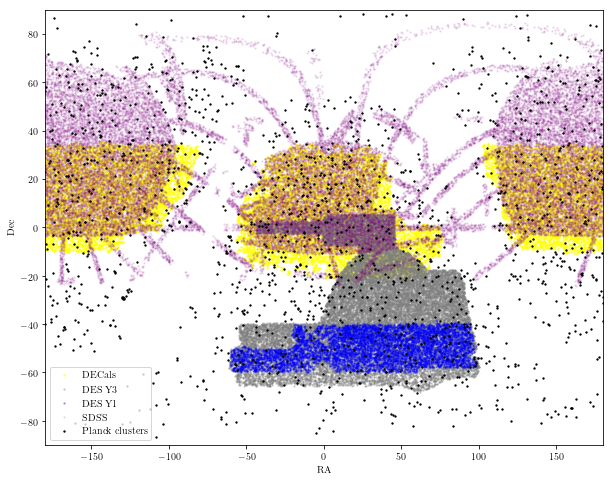

In [93]:
mplot.figure(figsize=(10,8))

ra2 = ra_ring[decals_mask ==1][ids4].copy()
ra2[ra2>180] -= 360
mplot.scatter(ra2, dec_ring[decals_mask ==1][ids4], alpha=0.5, s=2, color='yellow', label='DECals')

ra2 = ra_ring[des_y3_mask ==1][ids1].copy()
ra2[ra2>180] -= 360
mplot.scatter(ra2, dec_ring[des_y3_mask ==1][ids1], alpha=0.3, s=2, color='grey', label='DES Y3')

ra2 = ra_ring[des_y1_mask ==1][ids2].copy()
ra2[ra2>180] -= 360
mplot.scatter(ra2, dec_ring[des_y1_mask ==1][ids2], alpha=0.3, s=2, color='blue', label='DES Y1')

ra2 = ra_ring[sdss_mask ==1][ids3].copy()
ra2[ra2>180] -= 360
mplot.scatter(ra2, dec_ring[sdss_mask ==1][ids3], alpha=0.1, s=2, color='purple', label='SDSS')


mask = (Planck_z<0.1)*(Planck_z>0.0)
ra2 = Planck_ra.copy()
ra2[ra2>180] -= 360
mplot.scatter(ra2, Planck_dec, marker='.', color='k', s=7, label='Planck clusters')
# mplot.scatter(ra2[mask], Planck_dec[mask], marker='.', color='r', s=7)

mplot.legend()
mplot.xlim(-180,180)
mplot.ylim(-90,90)
mplot.xlabel('RA')
mplot.ylabel('Dec')

In [96]:
print('total Planck clusters', len(Planck_ra))
mask0 = (Planck_z>0.0)
print('total Planck clusters with 0<z', len(Planck_ra[mask0]))
print('total Planck clusters with 0<z<0.1', len(Planck_ra[mask]))
mask2 = (Planck_z<0.2)*(Planck_z>0.0)
print('total Planck clusters with 0<z<0.1', len(Planck_ra[mask2]))

total Planck clusters 1653
total Planck clusters with 0<z 1094
total Planck clusters with 0<z<0.1 228
total Planck clusters with 0<z<0.1 473


Text(0.5, 1.0, 'log(SNR)')

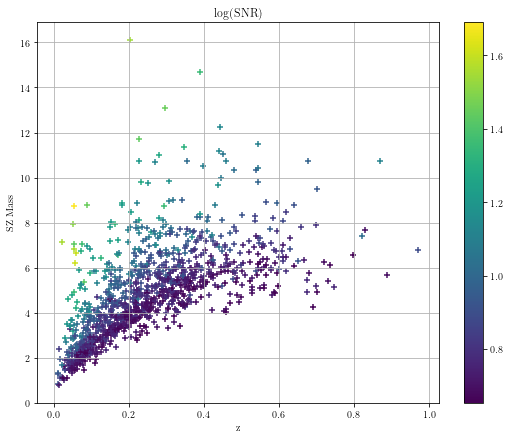

In [123]:
mplot.figure(figsize=(9,7))
mplot.scatter(Planck_z[Planck_z>0], Planck_mass[Planck_z>0], marker='+', c=np.log10(Planck_snr[Planck_z>0]))
mplot.xlabel('z')
mplot.ylabel('SZ Mass')
mplot.grid()
mplot.colorbar()
mplot.title('log(SNR)')

In [10]:
# help(proj.transform)

In [ ]:
# print number of total clusters
# number of clusters below redshift X
# number of clusters below redshift X and overlap with Y